# MSA 7A:(None Mass) Shooting Analysis: GVA Data Exploration (Illinois, 2024)

In [110]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import wikipedia as wp
import math

## Loading Data & Formatting Dates for Analysis

In [111]:
# Disable scientific notation globally
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = False
mpl.rcParams['axes.formatter.limits'] = (-999, 999)  # forces normal numbers
random.seed(33)

In [134]:
df = pd.read_csv('MSA Data\GVA_usa_6plus.csv')
scope = 'USA, 2012-25'
len(df)

727

In [135]:
df.head(3)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3311577,"September 20, 2025",Louisiana,Shreveport,1600 block of Poland St,2,6,0,0,0,NaN
1,3308426,"September 15, 2025",Minnesota,Minneapolis,28th Ave S and E Lake St,1,7,0,0,0,NaN
2,3297867,"August 30, 2025",Illinois,Chicago,3500 block of S State St,0,7,0,0,0,NaN


In [136]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
dtype: object

In [137]:
df['date'] = pd.to_datetime(df['Incident Date'], format = '%B %d, %Y', errors = 'coerce')

In [138]:
df = df.rename(columns={
    'City Or County': 'city',
    'Address': 'address',
    'Victims Killed': 'v_killed',
    'Victims Injured': 'v_injured',
    'Suspects Killed': 's_killed',
    'Suspects Injured': 's_injured',
    'Suspects Arrested': 's_arrested',
    'Incident ID': 'id'
    })
df.head(2)

,id,Incident Date,State,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,Operations,date
0,3311577,"September 20, 2025",Louisiana,Shreveport,1600 block of Poland St,2,6,0,0,0,NaN,2025-09-20
1,3308426,"September 15, 2025",Minnesota,Minneapolis,28th Ave S and E Lake St,1,7,0,0,0,NaN,2025-09-15


In [139]:
df['dow'] = df['date'].dt.day_name().str[:3]
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name().str[:3]
df['week'] = df['date'].dt.isocalendar().week
df['t_kill'] = df['v_killed'] + df['s_killed']
df['t_inj'] = df['v_injured'] + df['s_injured']
df['total'] = df['t_inj'] + df['t_kill']

In [140]:
df = df[[ 'date', 'dow','day', 'month', 'week','city', 'address', 'v_killed',
       'v_injured', 's_killed', 's_injured', 's_arrested', 't_kill', 't_inj', 'total', 'id']]
df.head(2)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2025-09-20,Sat,20,Sep,38,Shreveport,1600 block of Poland St,2,6,0,0,0,2,6,8,3311577
1,2025-09-15,Mon,15,Sep,38,Minneapolis,28th Ave S and E Lake St,1,7,0,0,0,1,7,8,3308426


## Largest Shooting Incidents in the State in 2024

In [141]:
df = df[(df.v_killed>3)]
len(df)

90

## Shooting Incidents over the Calendar Year - 2024

In [142]:
day_colours = {
    "Mon": "#a2bffe",  # pastel blue
    "Tue": "#7af9ab",  # Sea Foam Green
    "Wed": "#ffff14",  # Yellow
    "Thu": "#fdaa48",  # Light Orange    
    "Fri": "#ff474c",  # Light Red
    "Sat": "#910951",  # Reddish Purple
    "Sun": "#632de9",  # Purple Blue
}

In [143]:
month_colours = {
    "Jan": "#4C72B0", "Feb": "#6BAED6", "Mar": "#9ECAE1",
    "Apr": "#41AB5D", "May": "#74C476", "Jun": "#A1D99B",
    "Jul": "#FEC44F", "Aug": "#FE9929", "Sep": "#EC7014",
    "Oct": "#E6550D", "Nov": "#A63603", "Dec": "#756BB1"
}

Text(0.5, 0, 'Month')

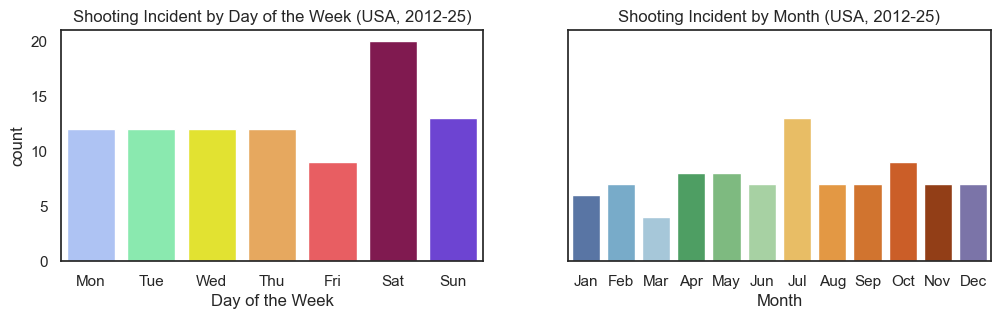

In [144]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

sns.countplot(df, x='dow', ax=ax1, palette = day_colours, hue='dow',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
             ).set_title('Shooting Incident by Day of the Week (' + scope + ')')
ax1.set_xlabel("Day of the Week")

sns.countplot(df, x='month', ax=ax2,palette = month_colours, hue='month',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
             ).set_title('Shooting Incident by Month (' + scope + ')')
ax2.set_xlabel("Month")
#plt.set_title('Mass Shooting Incident by Day of the Week & Month (\'14-\'24)')


**Day of the Week:** For all shooting incidents we see the same kind of pattern over the week as we saw with the national level data for MSI over 10 years, with most occuring over the weekend with Sunday being the most frequent day.

**Month of the Year:** Here we see that for shooting incidents in 2024 follows the general pattern we saw for MSI, with more in the summer months, although the highest month was June and not July here.

Text(0.5, 1.0, 'Shooting Incident by Week (USA, 2012-25)')

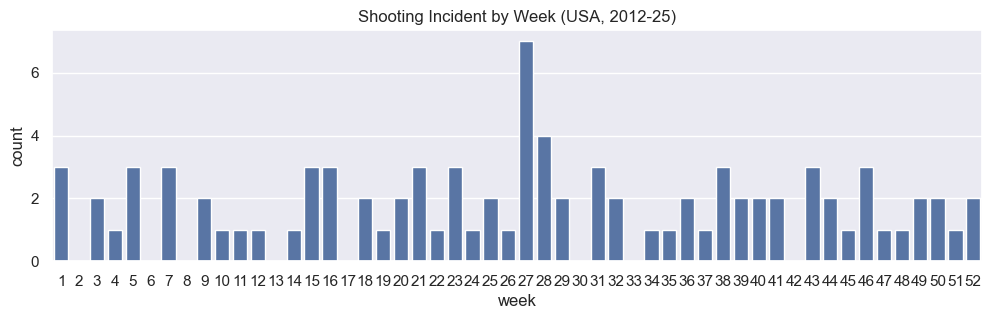

In [145]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.countplot(df, x='week', order=range(1,53), legend=False,).set_title('Shooting Incident by Week (' + scope + ')')

Text(0.5, 1.0, 'Shooting Incident by Day of Month (USA, 2012-25)')

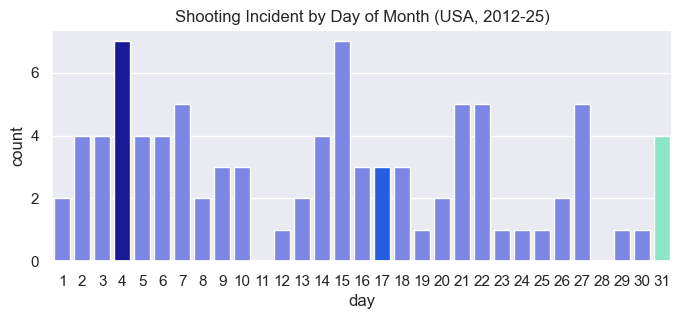

In [146]:
sns.set_theme()
plt.figure(figsize=(8,3))

all_days = sorted(df['day'].unique())
highlight_day = 31    
base_color = '#6a79f7'       # Cornflower Blue
highlight_color = "#7ef4cc" # Turquoise

day_palette = {day: base_color for day in all_days}
day_palette[highlight_day] = highlight_color
day_palette[17] = '#0652ff' # Electric Blue
day_palette[4] = '#0504aa' #Royal Blue

sns.countplot(df, x='day', order=range(1,32), palette=day_palette, hue = 'day', legend=False,).set_title('Shooting Incident by Day of Month (' + scope + ')')

* N.B. Again the 31st has the fewest number of incidents due to there being fewer 31sts than any other date.
* In Illinois in 2024 there were the highest number of shootings on the 5th of the month. In the 10 year span of MSI data, the 4th was the date with most mass shooting incidents, due to the 4th of July (and 5th second), let's have a look at the actual calendar dates in 2024 to see if there is any particular spike on one day that year.

## Days of Rage - Dates of 2024 with the highest number of Shooting Incidents in the State

In [147]:
rage_days = df.groupby(['day','month']).agg(
    no_inc = pd.NamedAgg(column="t_kill", aggfunc="count"),
    total_inj = pd.NamedAgg(column="t_inj", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="t_kill", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
).reset_index()
rage_days.nlargest(10, 'no_inc').reset_index(drop=True)

,day,month,no_inc,total_inj,total_kld,total_inj_kill
0,4,Jul,3,41,15,56
1,1,Oct,2,448,71,519
2,7,Jul,2,12,9,21
3,15,Apr,2,41,13,54
4,21,Jan,2,10,21,31
5,22,Apr,2,3,12,15
6,27,Oct,2,7,19,26
7,2,Apr,1,3,7,10
8,2,Dec,1,19,16,35
9,2,Feb,1,1,6,7


**Day of the Year:** In 2024 in the state of Illinois, there were the highest number of shooting incidents on the 5th July, while the 4th of July doesn't appear in the top 10 yet the 6th and 7th of July do (positions 9 and 10). As Independence Day fell on a Thursday in 2024, it would appear that the 'celebrations' continued over the long weekend, into Friday (5th) and Saturday and Sunday (6th & 7th).It's somewhat harder to explain why the 5th of July had so many more incidents than the other highest days, so could be an area for further investigation to see if this could be explained by gang-related shootings and reprisals for example.  

In [148]:
len(rage_days) # Check total of days that included a shooting incident as data started from incidents not dates.

82

Text(0.5, 0, 'Total Number of Incidents in a Day')

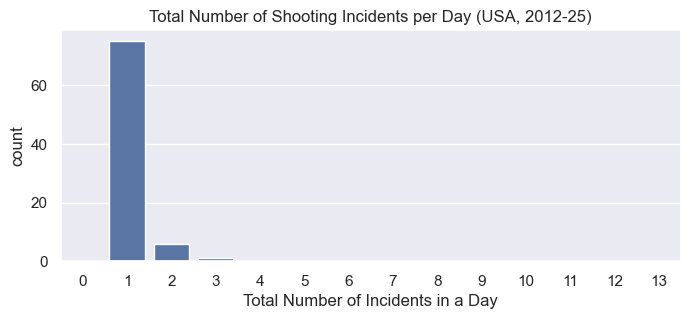

In [149]:
sns.set_theme()
plt.figure(figsize=(8,3))
sns.countplot(rage_days, x='no_inc',order=range(0,14)).set_title('Total Number of Shooting Incidents per Day (' + scope + ')')
plt.xlabel ('Total Number of Incidents in a Day')

* The distribution of the number of incidents in a day has a pretty curious shape for Illinois. If we compare it to that of California which has a similar overall number of shootings, we can see that the distribution for California is much more 'normal'. I think this may be due to the seasonal differences, as we can see from the monthly charts that the incidents in California are spread more evenly over the 12 months whereas Illinois has a much clearer peak in the summer months and fewer incidents in the winter months. This may explain the curious shape of the distribution as it is actally formed from 2 different more normal distributions with one stacked upon the other. Let's see if we can visualise this by splitting the dataset into two periods... 

In [150]:
winter = rage_days[(rage_days.month == 'Jan')|(rage_days.month=='Feb')|(rage_days.month == 'Mar')|(rage_days.month == 'Oct')|\
                    (rage_days.month == 'Nov')|(rage_days.month == 'Dec')]
summer = rage_days[(rage_days.month == 'Apr')|(rage_days.month=='May')|(rage_days.month == 'Jun')|(rage_days.month == 'Jul')|\
                    (rage_days.month == 'Aug')|(rage_days.month == 'Sept')]

Text(0.5, 0, 'Summer Months')

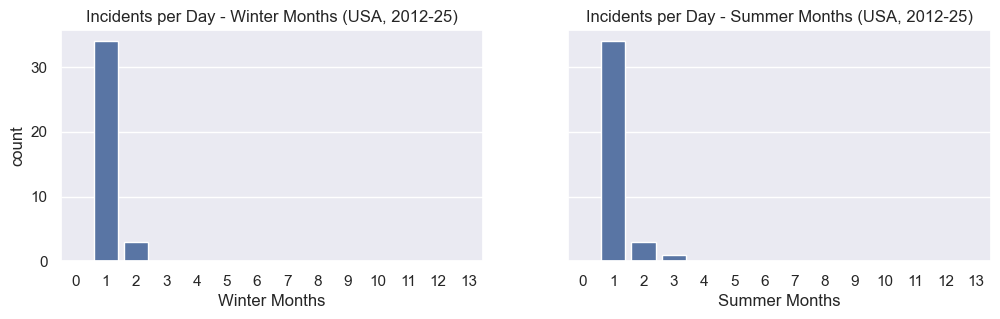

In [151]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
sns.countplot(winter, x='no_inc',order=range(0,14), ax=ax1).set_title('Incidents per Day - Winter Months (' + scope + ')')
sns.countplot(summer, x='no_inc',order=range(0,14), ax=ax2).set_title('Incidents per Day - Summer Months (' + scope + ')')
ax1.set_xlabel("Winter Months")
ax2.set_xlabel("Summer Months")

* By spliting the year into two periods we begin to get a clearer picture of how the overall distribution came about, **both charts show the right skew we would expect from incidence counts due to being bound at 0** (we can't have negative incidents), and **right-skewed with a long tail to the right**, which gives the overall distribution its distinctive shape.
* The shape **resembles the poisson distribution**, which we could have anticipated due to it's association with incidence counts, characterised by a convex left hand side, like a normal distribution, but then a **concave right hand side with a long tail to more extreme higher values**.

# Review of the 5ths of Each Month

In [152]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
rage_days['month'] = pd.Categorical(rage_days['month'], categories=months, ordered=True)
rage_days[(rage_days['day'] == 4)].sort_values(by='month')

,day,month,no_inc,total_inj,total_kld,total_inj_kill
10,4,Jan,1,0,8,8
12,4,Jun,1,0,7,7
11,4,Jul,3,41,15,56
9,4,Aug,1,17,10,27
13,4,Sep,1,7,4,11


* The 5th of July as an extreme outlier is the major reason that the 5ths came out on top in the day of the month chart. If the number of incidents on the 5th had been somewhere at the higher end of the normal range (around 20) then the 5ths total would be somewhere in the region of the other higher dates in the chart.
* The 5th also is one of the few dates that only include 2 weekend days (1 Sat, 1 Sun), which would have been the 2 dates with the highest number of incidents (of the 5ths), but are still less than half of the total incidents that occurred on the 5th July.

## Analysis of number of Victims Killed and Injured per Shooting Incident

(-0.5, 22.5)

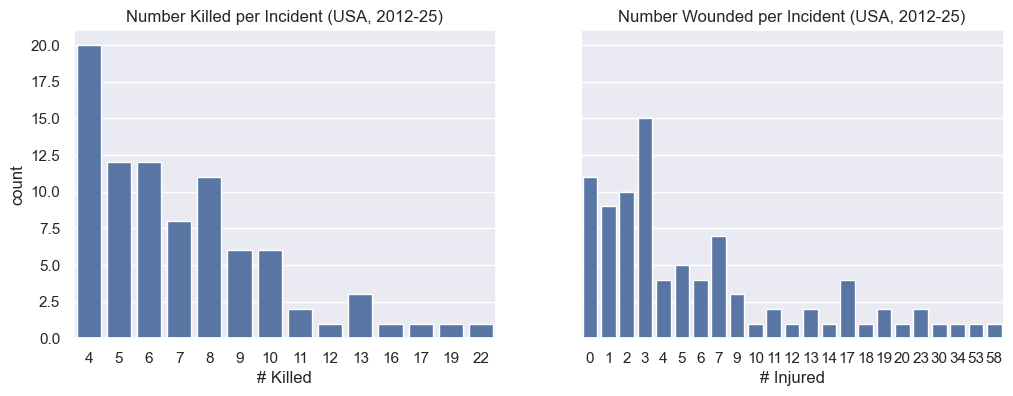

In [153]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.countplot(df, x='t_kill', ax=ax1).set_title('Number Killed per Incident (' + scope + ')')
ax1.set_xlabel("# Killed")
ax1.set_xlim(-0.5, 13.5)
sns.countplot(df, x='t_inj', ax=ax2).set_title('Number Wounded per Incident (' + scope + ')')
ax2.set_xlabel("# Injured")
ax2.set_xlim(-0.5, 22.5)

* So when we compare these 2 figures to the ones produced for 'Mass' shooting incidents - we can see that the vast majority of incidents where at least 1 person is shot involve nobody being killed and 1 person injured. There are a relatively small number of incidents where nobody is injured or killed, and nobody arrested. Further information regarding these subgroups are presented below.
* For Illinois, nobody was killed in 73% (2205/3018) of shooting incidents, and nobody was injured in 22.5% (680/3018) of incidents, although someone may have been killed in many of those incidents...

In [132]:
counts = pd.crosstab(df['v_killed'], df['v_injured'])

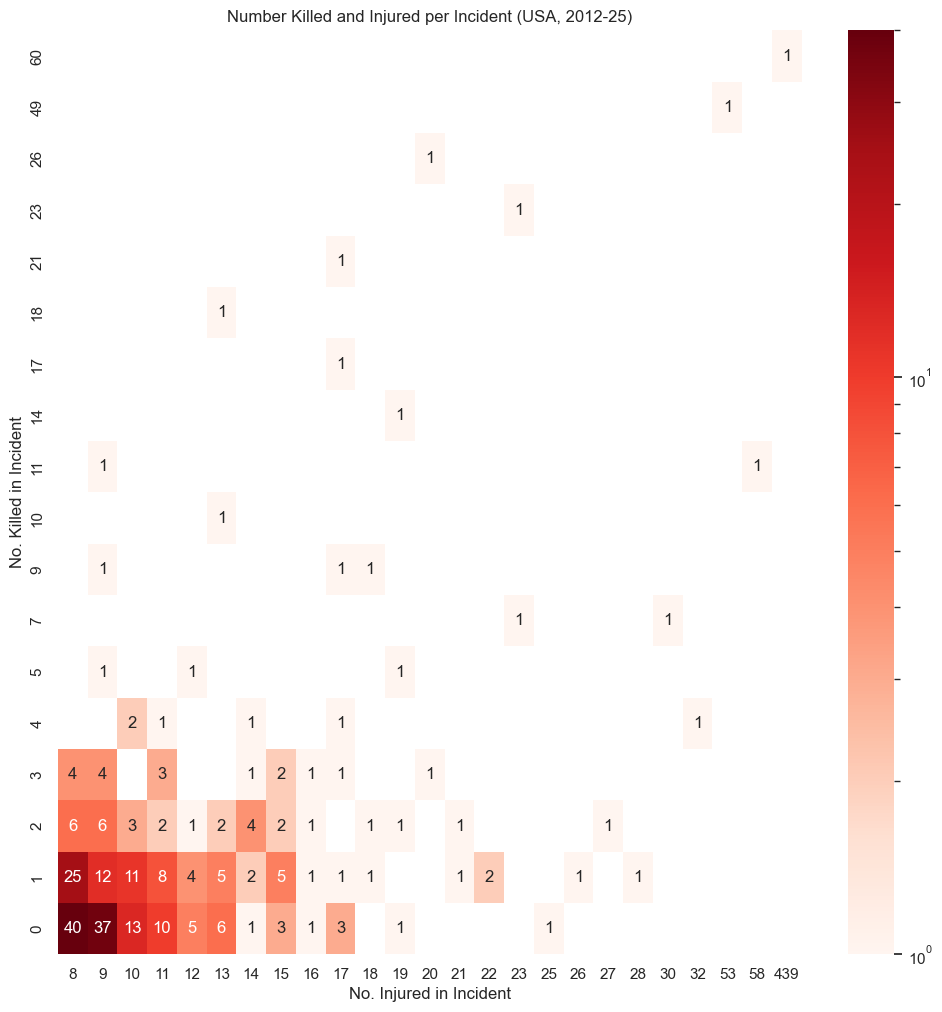

In [133]:
sns.set_style("white")
plt.figure(figsize=(12,12))
ax = sns.heatmap(counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
ax.invert_yaxis()
plt.grid(False)
plt.title('Number Killed and Injured per Incident (' + scope + ')')
plt.show()

In [107]:
percentages = counts / len(df) * 100

In [108]:
perc_focus = percentages.loc[0:10, 0:10]

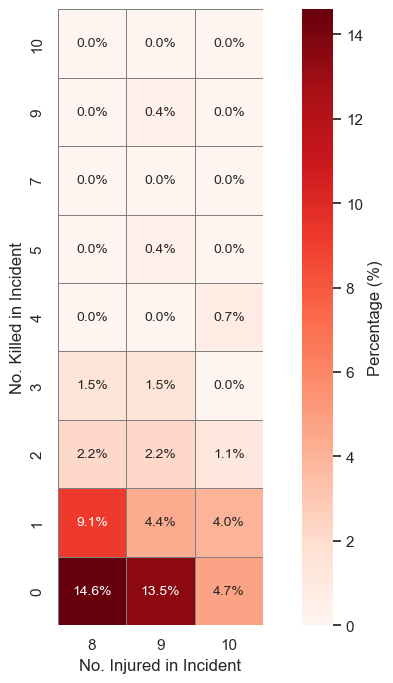

In [109]:
annot = perc_focus.map(lambda v: f"{v:.1f}%")

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    perc_focus,
    ax=ax,
    annot=annot,    # preformatted strings
    fmt='',         # use the strings exactly (no extra formatting)
    cmap='Reds',
    cbar_kws={'label': 'Percentage (%)'},
    square=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize':10}
)

# flip so that the first row (y=0) appears at the bottom
ax.invert_yaxis()
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
plt.show()

* This gives us a much clearer picture of what actually happened in the majority of incidents, as we can see the **vast majority of the incidents that involved no deaths, involved at least one person getting injured**. **So the actual percentage of incidents where no victims were harmed (or killed) is actually only 3.7% of the incidents**.

In [42]:
s_counts = pd.crosstab(df['s_killed'], df['s_injured'])

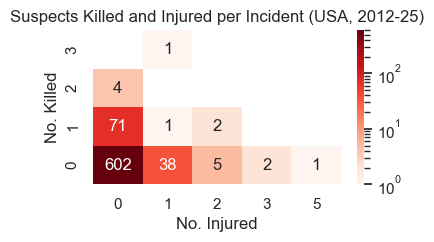

In [43]:
sns.set_style("white")
plt.figure(figsize=(4,2))
ax = sns.heatmap(s_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed')
ax.set_xlabel('No. Injured')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Killed and Injured per Incident (' + scope + ')')
plt.show()

In [44]:
sia_counts = pd.crosstab(df['s_injured'], df['s_arrested'])

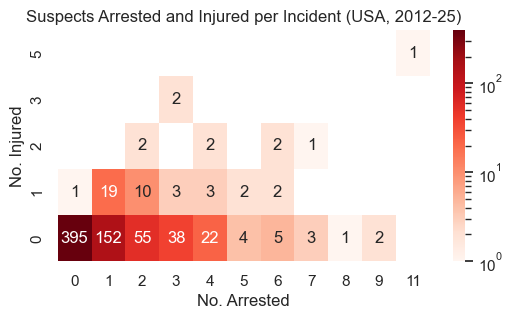

In [46]:
sns.set_style("white")
plt.figure(figsize=(6,3))
ax = sns.heatmap(sia_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Injured')
ax.set_xlabel('No. Arrested')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Arrested and Injured per Incident (' + scope + ')')
plt.show()

In [48]:
no_vict = df[(df['v_killed'] == 0) & (df['v_injured'] == 0)]
no_vict

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
579,2016-09-12,Mon,12,Sep,37,Ogden,243 30th Street,0,0,0,0,0,0,0,0,653917
581,2016-08-31,Wed,31,Aug,35,Renton,800 block of Pierce Ave NE,0,0,0,0,0,0,0,0,644794
602,2016-03-02,Wed,2,Mar,9,Baton Rouge,Avenue I,0,0,0,0,1,0,0,0,515482
614,2015-09-12,Sat,12,Sep,37,Tacoma,South 70th Street and South L Street,0,0,0,0,1,0,0,0,412892
640,2015-03-03,Tue,3,Mar,10,Corpus Christi,900 block of Louis Lynch Dr.,0,0,0,0,0,0,0,0,300706
652,2014-11-04,Tue,4,Nov,45,Antioch,5700 block of Longbranch,0,0,1,0,0,1,0,1,215544
661,2014-08-13,Wed,13,Aug,33,Corpus Christi,4300 Carlton St.,0,0,0,0,0,0,0,0,174743
688,2014-03-16,Sun,16,Mar,11,Columbus,8300 block of Twin Chapel Dr,0,0,0,0,2,0,0,0,117866
693,2014-01-16,Thu,16,Jan,3,Indianapolis,West 34th Street and North High School Road,0,0,0,0,0,0,0,0,96999


In [49]:
sus_counts = pd.crosstab(no_vict['s_killed'], no_vict['s_injured'])

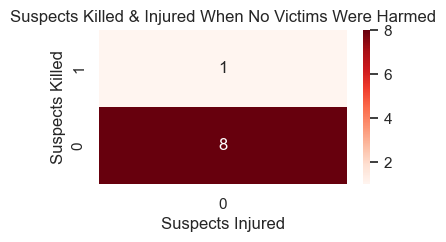

In [50]:
plt.figure(figsize=(4,2))
ax = sns.heatmap(sus_counts, 
                 annot=True, 
                 fmt="d", 
                 cmap="Reds")

ax.invert_yaxis()
ax.set_ylabel('Suspects Killed')
ax.set_xlabel('Suspects Injured')
plt.title('Suspects Killed & Injured When No Victims Were Harmed')
plt.show()

In [51]:
justice = no_vict[(no_vict.s_arrested > 1)]
justice

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
688,2014-03-16,Sun,16,Mar,11,Columbus,8300 block of Twin Chapel Dr,0,0,0,0,2,0,0,0,117866


* Many of these incidents generally involve defensive use of firearms to prevent other types of crimes, either by (potential) victims or law enforcement, and eventual arrest of the suspects.
* In the first incident listed *(3052644)*, a gang of 4 youths shot out of a moving vehicle in a parking lot, a man in the parking lot returned fire, injuring a 16-year old. All 4 of the people in the car were arrested including the injured 16-year old.
* In the 3rd it was accidental discharge that thwarted the crime: "16-year old robber accidentally shot 17-year old accomplice in the leg, while robbing 18-year old victim on a train.The gun was recovered." *(2926555)*

In [52]:
no_harm_done = no_vict[(no_vict['s_killed'] == 0) & (no_vict['s_injured'] == 0) & (no_vict['s_arrested'] == 0)]
no_harm_done.sample(5)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
640,2015-03-03,Tue,3,Mar,10,Corpus Christi,900 block of Louis Lynch Dr.,0,0,0,0,0,0,0,0,300706
579,2016-09-12,Mon,12,Sep,37,Ogden,243 30th Street,0,0,0,0,0,0,0,0,653917
581,2016-08-31,Wed,31,Aug,35,Renton,800 block of Pierce Ave NE,0,0,0,0,0,0,0,0,644794
693,2014-01-16,Thu,16,Jan,3,Indianapolis,West 34th Street and North High School Road,0,0,0,0,0,0,0,0,96999
661,2014-08-13,Wed,13,Aug,33,Corpus Christi,4300 Carlton St.,0,0,0,0,0,0,0,0,174743


Of the 12 incidents that involved no one getting hurt or arrested: 
* 6 involved people reported or spotted **on or near school grounds with a gun**.
* 3 more involved an **attempted car-jacking, robbery or shooting** where the victim had a concealed carry license (CCL) and returned fire, but nobody was hit.
* 1 involved the **theft of 35 guns** from a storage unit.
* 1 was an event where people could **turn in their guns at a church**.
* 1 with **no information** about the incident.